In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [71]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath

## First attempt at plotting patches

In [60]:
def generate_regular_polygon(n, center, scale):
    arr = np.asarray([(np.cos(2 * k * np.pi / n), np.sin(2 * k * np.pi / n))  for k in range(n)])
    arr *= scale
    arr += center
    return arr


In [100]:
def generate_regular_star(n, center, scale):
    polygon = list(generate_regular_polygon(n, center, scale))
    polygon.append(polygon[0])
    vertices = []
    
    for start, end in zip(polygon, polygon[1:]):
        midpoint = (start + end) / 2
        mid_to_center = (midpoint + center) / 2
        vertices.extend([start, mid_to_center])
        
    vertices.append(polygon[0])
    return np.asarray(vertices)


In [116]:
def generate_shape_path_curve4(n, center, scale, vertex_noise, path_noise):
    p = generate_regular_polygon(n, center, scale)
    p += np.random.normal(0, vertex_noise, p.shape)
    polygon = list(p)
    polygon.append(polygon[0])
    vertices = []
    
    for start, end in zip(polygon, polygon[1:]):
        diff = end - start
        first = start + diff / 3 + np.random.normal(0, path_noise, (2,))
        second = start + diff * 2 / 3 + np.random.normal(0, path_noise, (2,))
        vertices.extend([start, first, second])
        
    vertices.append(polygon[0])
    codes = [mpath.Path.CURVE4] * len(vertices)
    codes[0] = mpath.Path.MOVETO
    return mpath.Path(vertices, codes)
    
def generate_shape_path_curve3(n, center, scale, vertex_noise, path_noise):
    p = generate_regular_polygon(n, center, scale)
    p += np.random.normal(0, vertex_noise, p.shape)
    polygon = list(p)
    polygon.append(polygon[0])
    vertices = []
    
    for start, end in zip(polygon, polygon[1:]):
        mid = (start + end) / 2 + np.random.normal(0, path_noise, (2,))
        vertices.extend([start, mid])
        
    vertices.append(polygon[0])
    codes = [mpath.Path.CURVE3] * len(vertices)
    codes[0] = mpath.Path.MOVETO
    return mpath.Path(vertices, codes)
    

In [73]:
generate_shape_path(4, (100, 100), 100, 50)

Path(array([[200.        , 100.        ],
       [151.13656922, 167.34665665],
       [151.28794242, 212.46372668],
       [100.        , 200.        ],
       [ 71.60084382, 160.80748819],
       [ 50.27918722, 174.5158012 ],
       [  0.        , 100.        ],
       [ 15.61087157, 101.59011156],
       [ 77.87315044,  10.73538763],
       [100.        ,   0.        ],
       [166.00538722, 130.28825228],
       [231.3939371 ,  16.0792167 ],
       [200.        , 100.        ]]), array([1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=uint8))

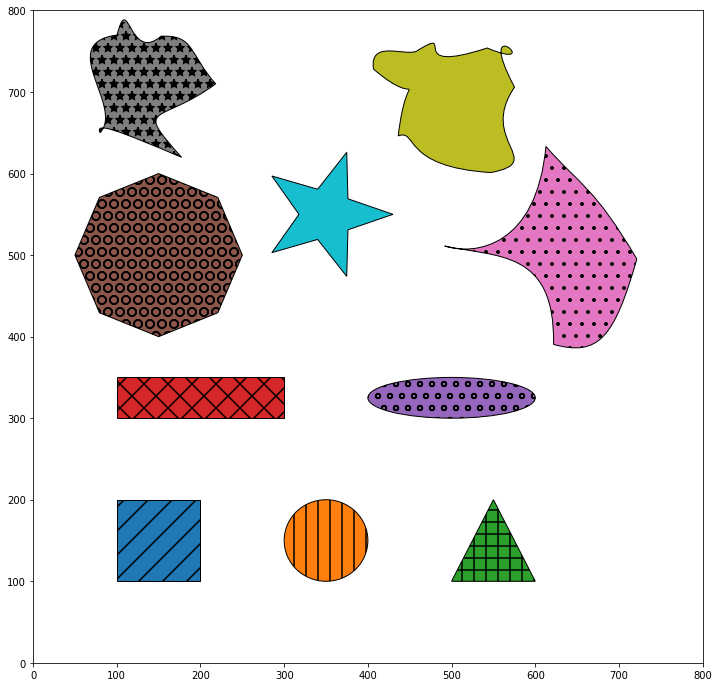

In [121]:
matplotlib.rcParams['hatch.linewidth'] = 1.5

colors = plt.get_cmap('tab10').colors

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.set_xlim(0, 800)
ax.set_ylim(0, 800)

square = patches.Rectangle((100, 100), 100, 100, facecolor=colors[0], edgecolor='black', hatch='/')
ax.add_patch(square)

circle = patches.Circle((350, 150), 50, facecolor=colors[1], edgecolor='black', hatch='|')
ax.add_patch(circle)

triangle = patches.Polygon([(500, 100), (600, 100), (550, 200)],
                          facecolor=colors[2], edgecolor='black', hatch='+')
ax.add_patch(triangle)

rect = patches.Rectangle((100, 300), 200, 50, facecolor=colors[3], edgecolor='black', hatch='x')
ax.add_patch(rect)

ellipse = patches.Ellipse((500, 325), 200, 50, facecolor=colors[4], edgecolor='black', hatch='o')
ax.add_patch(ellipse)

octagon = patches.Polygon(generate_regular_polygon(8, (150, 500), 100),
                          facecolor=colors[5], edgecolor='black', hatch='O')
ax.add_patch(octagon)

path_shape = patches.PathPatch(generate_shape_path_curve4(4, (600, 500), 100, 20, 40),
                              facecolor=colors[6], edgecolor='black', hatch='.')
ax.add_patch(path_shape)

path_shape_2 = patches.PathPatch(generate_shape_path_curve4(5, (150, 700), 80, 20, 40),
                              facecolor=colors[7], edgecolor='black', hatch='*')
ax.add_patch(path_shape_2)

path_shape_3 = patches.PathPatch(generate_shape_path_curve4(6, (500, 700), 80, 20, 40),
                              facecolor=colors[8], edgecolor='black', hatch='')
ax.add_patch(path_shape_3)

star_shape = patches.Polygon(generate_regular_star(5, (350, 550), 80),
                          facecolor=colors[9], edgecolor='black', hatch='')
ax.add_patch(star_shape)

plt.show()

## TODO: try the curves with one-control point bezier